In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('medical_examination.csv')

In [41]:
df
# note on the data
# age is in DAYS
# height is in CM
# weight is in KG

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1


In [42]:
# add a column based on BMI
# based on what the project wants
df['overweight'] = df.apply(lambda x: 1 if (x.weight / (np.square(x.height / 100))) > 25 else 0, axis=1)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [43]:
# normalizing data to turn 0s and 1s to 0s, rep'ing good, above that bad
def normalize_values(value, **kwargs):
    if value <= 1:
        value = 0
    else:
        value = 1
    return value

for i in range(7, 9):
    df.iloc[:, i] = df.apply(lambda x: normalize_values(x[i]), axis=1)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,0,0,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,0,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,0,0,0,0,1,1


In [14]:
# convert df from wide to long using pd.melt
# only use values for 'cholesterol', 'gluc', 'smoke', 'alco', 'active' and 'overweight'
df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
# df_cat = df_cat.groupby(by=['variable', 'value']).count()
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [17]:
df_cat.groupby(by=['cardio', 'variable']).count()

value
cardio variable          
0      active       35021
       alco         35021
       cholesterol  35021
       gluc         35021
       overweight   35021
       smoke        35021
1      active       34979
       alco         34979
       cholesterol  34979
       gluc         34979
       overweight   34979
       smoke        34979

In [12]:
# attempt to do the catplot
sns.catplot( 
    x = 'variable',
    y = 'total',
    hue = 'value', 
    col = 'cardio',
    data= df_cat
    )

ValueError: Could not interpret input 'variable'

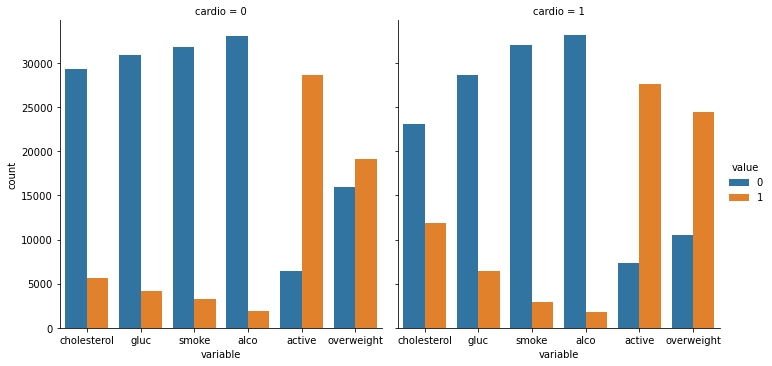

In [18]:
# courtesy of ArbyC on freeCodeCamp forums
sns.catplot(
    data=df_cat,
    kind='count',
    x='variable',
    hue='value',
    col='cardio'
)

In [20]:
df.shape

(70000, 14)

In [49]:
# clean data for heatmap
# does the ap_lo <= ap_hi cleaning
df_heat = df[(df['ap_lo'] <= df['ap_hi'])]

# remove height under 2.5th percentile
df_heat = df_heat[(df['height'] >= df['height'].quantile(0.025))]

# remove height over 97.5 percentile
df_heat = df_heat[(df['height'] <= df['height'].quantile(0.975))]

# remove weight under 2.5th percentile
df_heat = df_heat[(df['weight'] >= df['weight'].quantile(0.025))]

# remove weight above 97.5 percentile
df_heat = df_heat[(df['weight'] <= df['weight'].quantile(0.975))]

df_heat

<ipython-input-49-dd7d56bde5d0>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = df_heat[(df['height'] >= df['height'].quantile(0.025))]
<ipython-input-49-dd7d56bde5d0>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = df_heat[(df['height'] <= df['height'].quantile(0.975))]
<ipython-input-49-dd7d56bde5d0>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = df_heat[(df['weight'] >= df['weight'].quantile(0.025))]
<ipython-input-49-dd7d56bde5d0>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = df_heat[(df['weight'] <= df['weight'].quantile(0.975))]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,0,0,0,0,1,1
